### Computação Quântica com Qiskit <br> Autor: Jonas Maziero

# Algoritmo de Deutsch

Queremos determinar se uma função 
$$f:\{0,1\}\rightarrow\{0,1\}$$ 
é __constante__, 
$$f(0)=f(1),$$
ou __balanceada__, 
$$f(0)\ne f(1).$$
Temos
* Classicamente, precisamos calcular $f(0)$ e $f(1)$.
* Quanticamente aplica-se o circuito uma única vez.

O circuito da figura abaixo ilustra o algoritmo de Deutsch pra resolver este problema (https://arxiv.org/abs/2109.07910v1).

<img src="fig_deutsch_algo.png" width="500">

- Superposição: $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=|+\rangle$, $H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)=|-\rangle$. Assim 
\begin{align}
|\psi_{1}\rangle & = H|0\rangle H|1\rangle \\
& = \frac{1}{2}\big(|0\rangle|0\rangle-|0\rangle|1\rangle+|1\rangle|0\rangle-|1\rangle|1\rangle\big).
\end{align}

__Caixa preta (oráculo)__: 
$$U_{f}|x\rangle|y\rangle = |x\rangle|y\oplus f(x)\rangle.$$
Algoritmos como o de Deutsch são chamados de algoritmos quânticos de consulta (quantum query algorithms), pois assumem que um 3ª parte implementa o oráculo $U_{f}$ e os computadores clássico e quântico fazem consultas a esse oráculo. Neste contexto, a vantagem do computador quântico se deve ao menor número de consultas ao oráculo para resolver uma dado problema, em relação ao computador clássico. 

Assim 
\begin{align}
 & |\psi_{2}\rangle= \frac{1}{2}\big(U_{f}|0\rangle|0\rangle-U_{f}|0\rangle|1\rangle+U_{f}|1\rangle|0\rangle-U_{f}|1\rangle|1\rangle\big) \\
&= \frac{1}{2}\big(|0\rangle|0\oplus f(0)\rangle-|0\rangle|1\oplus f(0)\rangle+|1\rangle|0\oplus f(1)\rangle-|1\rangle|1\oplus f(1)\rangle\big) \\
&= \frac{1}{2}\big(|0\rangle|f(0)\rangle-|0\rangle|\overline{f(0)}\rangle+|1\rangle|f(1)\rangle-|1\rangle|\overline{f(1)}\rangle\big).
\end{align}

- Função constante:
\begin{equation}
|\psi_{2}\rangle_{f(0)=f(1)} = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\frac{1}{\sqrt{2}}(|f(0)\rangle-|\overline{f(0)}\rangle).
\end{equation}
- Função balanceada:
\begin{equation}
|\psi_{2}\rangle_{f(0)\ne f(1)} = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)\frac{1}{\sqrt{2}}(|f(0)\rangle-|\overline{f(0)}\rangle).
\end{equation}

- Usando interferência ($H|+\rangle=|0\rangle$ e $H|-\rangle=|1\rangle$):
\begin{equation}
|\psi_{3}\rangle_{f(0)=f(1)} =  H|+\rangle\frac{1}{\sqrt{2}}(|f(0)\rangle+|\overline{f(0)}\rangle) = |0\rangle\frac{1}{\sqrt{2}}(|f(0)\rangle-|\overline{f(0)}\rangle).
\end{equation}
\begin{equation}
|\psi_{3}\rangle_{f(0)\ne f(1)} = H|-\rangle\frac{1}{\sqrt{2}}(|f(0)\rangle+|\overline{f(0)}\rangle) = |1\rangle\frac{1}{\sqrt{2}}(|f(0)\rangle-|\overline{f(0)}\rangle).
\end{equation}

- Mede o 1º qubit:
\begin{cases}
0 \therefore \text{ a função é constante, } \\
1 \therefore \text{ a função é balanceada}.
\end{cases}

__Rationalis__: 
\begin{align}
U_{f}|x\rangle|-\rangle & = \frac{1}{\sqrt{2}}\big(|x\rangle|0\oplus f(x)\rangle - |x\rangle|1\oplus f(x)\rangle\big) \\
& = |x\rangle\frac{1}{\sqrt{2}}\big(|f(x)\rangle - |\overline{f(x)}\rangle\big) \\
& = (-1)^{f(x)}|x\rangle|-\rangle.
\end{align}
É essencial que o estado inicial do 2º qubit seja $|-\rangle$. É direto ver com isso que 
\begin{align}
U_{f}|+\rangle|-\rangle &= \frac{1}{\sqrt{2}}\big(U_{f}|0\rangle|-\rangle+U_{f}|1\rangle|-\rangle\big) \\
& = \frac{1}{\sqrt{2}}\big((-1)^{f(0)}|0\rangle|-\rangle+(-1)^{f(1)}|1\rangle|-\rangle\big) \\
& = \frac{(-1)^{f(0)}}{\sqrt{2}}\big(|0\rangle+(-1)^{f(1)-f(0)}|1\rangle\big)|-\rangle.
\end{align}
Ou seja, a diferença da função aplicada em ambos os argumentos aparece na deferenção de fase entre os estados da base computacional que aparecem na superposição.

## Algoritmo de Deutsch-Jozsa
Uma função 
$$f:\{0,\cdots,2^{n}-1\}\rightarrow \{0,1\},$$ ou 
$$f:\{0,1\}^{n}\rightarrow \{0,1\},$$
é __constante__ se 
$$f(x)=f(y)\ \forall x,y$$
e __balanceada__ se 
$$f(x)=0 \text{para metade dos valores e } f(y)=1 \text{ para a outra metade.}$$
O circuito da figura abaixo ilustra o algoritmo de Deutsch-Jozsa.

<img src="fig_deutsch_jozsa.png" width="450">

Temos que
\begin{align}
|\psi_{0}\rangle & = |0\rangle^{\otimes n}|1\rangle \\
& \equiv |0\rangle\otimes\cdots\otimes|0\rangle\otimes|1\rangle.
\end{align}
Aplicando as portas de Hadamard, criamos a superposição de estados
\begin{align}
|\psi_{1}\rangle & = H^{\otimes n}H|\psi_{0}\rangle \\
& = H|0\rangle\otimes\cdots\otimes H|0\rangle\otimes H|1\rangle \\
& = |+\rangle\otimes\cdots\otimes |+\rangle\otimes |-\rangle \\
& = |+\rangle^{\otimes n}|-\rangle.
\end{align}
Usando alguns exemplos, veremos como o estado acima poder ser escrito como uma superposição:
\begin{align}
|+\rangle & = \frac{1}{2^{1/2}}\big(|0\rangle + |1\rangle\big) \\
& = \frac{1}{2^{1/2}}\sum_{x_{0}=0}^{1}|x_{0}\rangle, \\
|+\rangle^{\otimes 2} & = \frac{1}{2^{1/2}}\big(|0\rangle + |1\rangle\big)\frac{1}{2^{1/2}}\big(|0\rangle + |1\rangle\big) \\
& = \frac{1}{2^{2/2}}\big(|00\rangle + |01\rangle + |10\rangle + |11\rangle\big) \\
& = \frac{1}{2^{2/2}}\sum_{x_{1}=0}^{1}\sum_{x_{0}=0}^{1}|x_{1}x_{0}\rangle, \\
& \vdots \\
|+\rangle^{\otimes n} & = \frac{1}{2^{n/2}}\sum_{x_{n-1}=0}^{1}\cdots\sum_{x_{1}=0}^{1}\sum_{x_{0}=0}^{1}|x_{n-1}\cdots x_{1}x_{0}\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle, \\
\end{align}
Notemos que cada sequência $x_{n-1}\cdots x_{1}x_{0}$ nos fornece a _representação binária_, com $n$ bits, do número com representação decimal
$$x = x_{0}2^{0}+x_{1}2^{1}+\cdots+x_{n-1}2^{n-1}\in[0,2^{n}-1].$$

Teremos assim que
\begin{align}
|\psi_{1}\rangle & = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\frac{|0\rangle-|1\rangle}{\sqrt{2}}.
\end{align}

Agora vamos para a aplicação do oráculo, que neste caso também é definido como
$$U_{f}|x\rangle|y\rangle := |x\rangle|y\oplus f(x)\rangle.$$
Com isso obteremos
\begin{align}
|\psi_{2}\rangle & = U_{f}|\psi_{1}\rangle \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(U_{f}|x\rangle|0\rangle - U_{f}|x\rangle|1\rangle\big) \\
& = \frac{1}{2^{(n+1)/2}}\sum_{x=0}^{2^{n}-1}\big(|x\rangle|0\oplus f(x)\rangle - |x\rangle|1\oplus f(x)\rangle\big) \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle\frac{|f(x)\rangle - |\overline{f(x)}\rangle}{\sqrt{2}} \\
& = \frac{1}{2^{n/2}}\sum_{x=0}^{2^{n}-1}|x\rangle(-1)^{f(x)}|-\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}|x_{n-1}\cdots x_{1}x_{0}\rangle|-\rangle.
\end{align}

Por fim, notando que 
$$H|x_{j}\rangle = \frac{1}{2^{1/2}}\big(|0\rangle+(-1)^{x_{j}}|1\rangle\big),$$
aplicamos as $n$ portas de Hadamard para obter
\begin{align}
|\psi_{3}\rangle &= H^{\otimes n}\otimes I|\psi_{2}\rangle \\
& = \frac{1}{2^{n/2}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}\Big(H|x_{n-1}\rangle\cdots H|x_{1}\rangle H|x_{0}\rangle\Big)|-\rangle \\
&  = \frac{1}{2^{n}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}\Big(\big(|0\rangle+(-1)^{x_{n-1}}|1\rangle\big)\cdots \big(|0\rangle+(-1)^{x_{1}}|1\rangle\big) \big(|0\rangle+(-1)^{x_{0}}|1\rangle\big)\Big)|-\rangle.
\end{align}
Agora, notamos que
\begin{align}
\big(|0\rangle+(-1)^{x_{j}}|1\rangle\big) & = (-1)^{x_{j}0}|0\rangle + (-1)^{x_{j}1}|1\rangle \\
& = \sum_{z_{j}=0}^{1}(-1)^{x_{j}z_{j}}|z_{j}\rangle, \\
\end{align}
para escrever
\begin{align}
|\psi_{3}\rangle & = \frac{1}{2^{n}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})}\Big(\sum_{z_{n-1}=0}^{1}(-1)^{x_{n-1}z_{n-1}}|z_{n-1}\rangle\cdots \sum_{z_{1}=0}^{1}(-1)^{x_{1}z_{1}}|z_{1}\rangle \sum_{z_{0}=0}^{1}(-1)^{x_{0}z_{0}}|z_{0}\rangle\Big)|-\rangle \\
& = \frac{1}{2^{n}}\sum_{x_{n-1},\cdots, x_{1},x_{0}=0}^{1}\sum_{z_{n-1},\cdots, z_{1},z_{0}=0}^{1}(-1)^{f(x_{n-1}\cdots x_{1}x_{0})+x_{n-1}z_{n-1}+\cdots+x_{1}z_{1}+x_{0}z_{0}}|z_{n-1}\cdots z_{1}z_{0}\rangle|-\rangle \\ 
& =: \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}\sum_{z=0}^{2^{n}-1}(-1)^{f(x)+x\cdot z}|z\rangle|-\rangle \\
& =: \sum_{z=0}^{2^{n}-1}c_{z}|z\rangle|-\rangle,
\end{align}
em que definimos
\begin{align}
x\cdot z & := x_{n-1}z_{n-1}+\cdots+x_{1}z_{1}+x_{0}z_{0} \\
& = \sum_{j=0}^{n-1}x_{j}z_{j}
\end{align}
e
$$c_{z} := \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}(-1)^{f(x)+x\cdot z}.$$

Seguindo, olhamos para o coeficiente $c_{0}=c_{0\cdots00}$. Nesse caso, como $z_{n-1}=\cdots=z_{1}=z_{0}=0$ teremos 
$x\cdot z=0$ e
$$c_{0} = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}(-1)^{f(x)}.$$

Por conseguinte
\begin{equation}
\begin{cases}
f\text{ é constante }\therefore c_{0} = \frac{1}{2^{n}}\sum_{x=0}^{2^{n}-1}(\pm 1) = \pm 1 \ \therefore\ Pr(0\cdots 00)=1, \\
f\text{ é balanceada }\therefore c_{0} = \frac{1}{2^{n}}0 = 0 \ \therefore\ Pr(0\cdots 00)=0.
\end{cases}
\end{equation}
Acima usamos que se $f$ é constante então $f(x)$ é $=0$ ou $=1$ pra todo $x$. Se $f$ é balanceada, então $f(x)$ é $=0$ para metade dos valores de $x$ e $=1$ para a outra metade dos valores de $x$.

## Implementação no IBMQ

In [1]:
import qiskit
from qiskit import *

Exemplo de __função constante__:
$$f_{c}(x)=1.$$

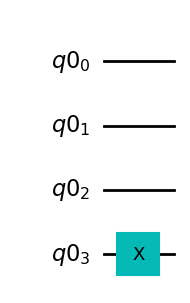

In [2]:
def Uf_c(n):
    qr = QuantumRegister(n+1)
    qc = QuantumCircuit(qr, name = 'Uf_c')
    qc.x(qr[n])
    return qc
qc = Uf_c(3)
qc.draw('mpl')

Exemplo de __função balanceada__:
$$f_{b}(x)=\begin{cases}0 \text{ se } x\le 3 \\ 1 \text{ se } x> 3 \end{cases}.$$

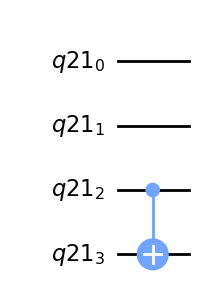

In [10]:
def Uf_b(n): 
    qr = QuantumRegister(n+1)
    qc = QuantumCircuit(qr, name = 'Uf_b')
    qc.cx(qr[n-1],qr[n])
    return qc
qc = Uf_b(3)
qc.draw('mpl')

In [6]:
def deutsch_jozsa(n, typ):
    qr = QuantumRegister(n+1)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr,cr)
    qc.x(qr[n])
    for j in range(0,n+1):
        qc.h(qr[j])
    qc.barrier()
    qrs = []
    for j in range(0,n+1):
        qrs.append(qr[j])
    if typ == 'c':
        qc_uf = Uf_c(n)
        qc.append(qc_uf, qrs)
    elif typ == 'b':
        qc_uf = Uf_b(n)
        qc.append(qc_uf, qrs)
    qc.barrier()
    for j in range(0,n):
        qc.h(qr[j])
    for j in range(0,n):
        qc.measure(qr[j], cr[j])
    return qc

#### Exemplo de função constante

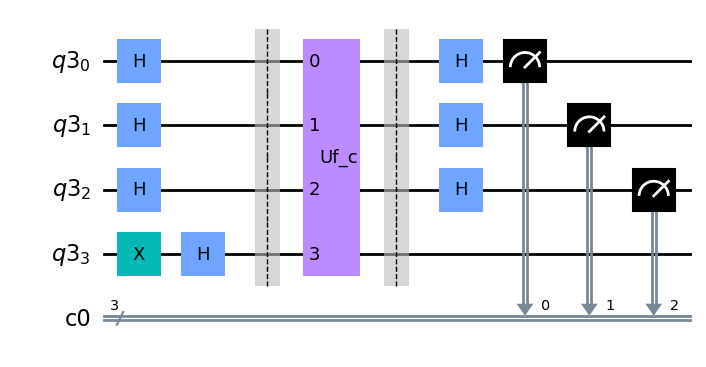

In [7]:
qc = deutsch_jozsa(3, 'c')
qc.draw('mpl')

### Simulação

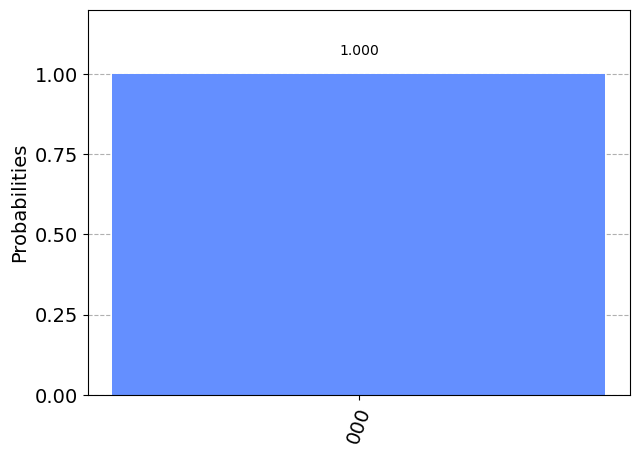

In [8]:
simulator = Aer.get_backend('qasm_simulator')
nshots = 8192
result = execute(qc, backend = simulator, shots = nshots).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc))

### Experimento

In [46]:
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
from qiskit.tools.monitor import backend_overview, backend_monitor
job = execute(qc, backend = device, shots = nshots)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

ibmqfactory.load_account:WARNING:2021-11-17 22:57:30,611: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


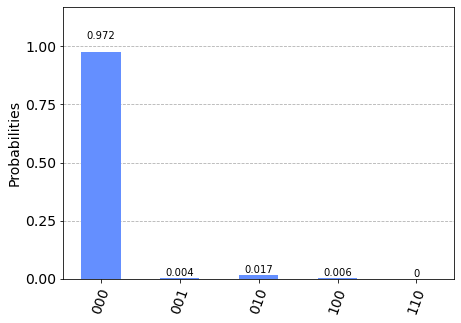

In [47]:
result = job.result(); plot_histogram(result.get_counts(qc))

#### Exemplo de função balanceada

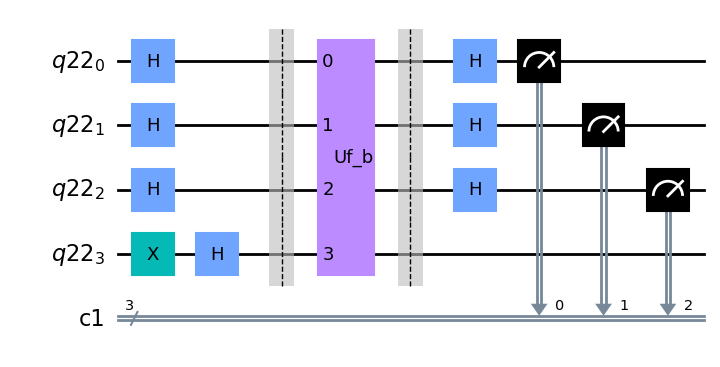

In [11]:
qc = deutsch_jozsa(3, 'b')
qc.draw('mpl') # exemplo de funcao balanceada

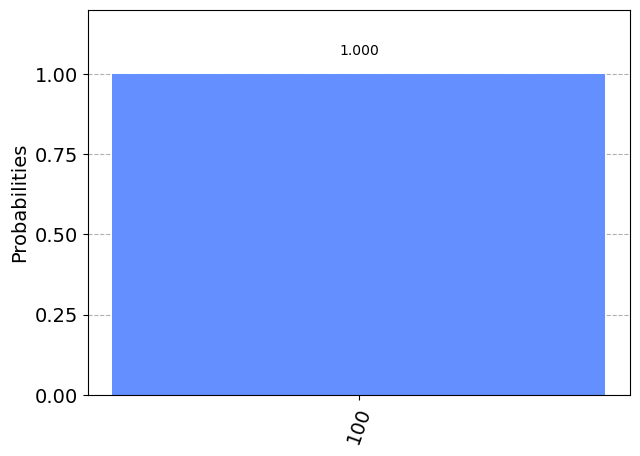

In [12]:
job = execute(qc, backend = simulator, shots = nshots)
plot_histogram(job.result().get_counts(qc))

In [50]:
job = execute(qc, backend = device, shots = nshots)
job_monitor(job)

Job Status: job has successfully run


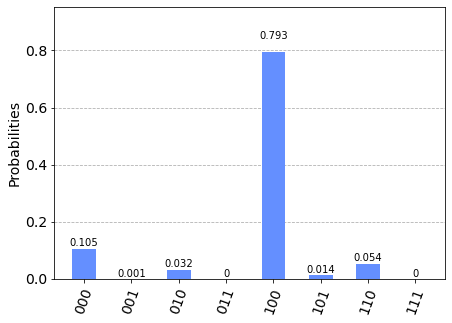

In [51]:
plot_histogram(job.result().get_counts(qc))